## 차원과 차원 축소
지금까지 데이터가 가진 속성을 특성이라 불렀다. 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다고 볼 수 있다. 머신러닝에서는 이런 특성을 **차원(dimension)**이라고도 부른다. - 여기에서 차원은 우리가 알고있는 차원과 다를 수 있는데, 원래 알고있던 차원은 1차원 배열, 2차원 배열처럼 축의 개수가 늘어나는 것이었으나, 1차원 배열, 즉 벡터에서는 길이 자체가 차원이다. 예를 들면 vec[5]가 있으면 여기에서는 5차원 벡터라 볼 수 있다. - 이야기를 이어나가면 10,000개의 특성은 10,000개의 차원이라는 것인데 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다

이를 위해서 비지도 학습 작업 중 하나인 **차원 축소(dimensionality reduction)** 알고리즘을 다루어보자. 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다. 여기서는 대표적인 차원 축소 알고리즘인 **주성분 분석(principal component analysis, A.K.A PCA)**에 대해 알아본다

--2021-12-16 13:23:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-12-16 13:23:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-12-16 13:23:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

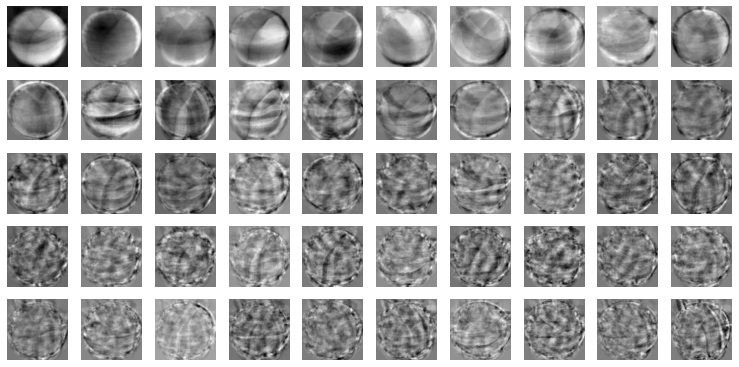

In [4]:
# 사진 데이터 다운
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

# 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

# components_: PCA 클래스가 찾은 주성분
print(pca.components_.shape)

# 50개의 주성분을 찾음
# 주성분을 이미지화 하여 출력
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for u in range(cols):
            if i*10 + u < n:
                axs[i, u].imshow(arr[i * 10 + u], cmap='gray_r')
            axs[i, u].axis('off')
    plt.show()

# 주성분을 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
draw_fruits(pca.components_.reshape(-1, 100, 100), 1.3)

In [5]:
# 차원 축소: 특성 10,000개에서 50개로 줄이기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


## 원본 데이터 재구성
위에서 10,000개의 특성을 50개로 줄였다. 이로 인해 어느정도 손실이 발생될 수 있지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 복원할 수 있다. PCA 클래스의 inverse_transform() 메서드를 이용하여 차원을 복원해보자

(300, 10000)


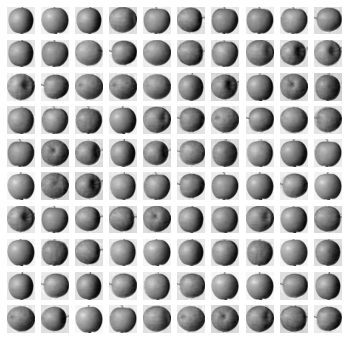

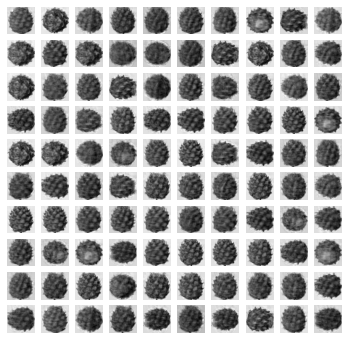

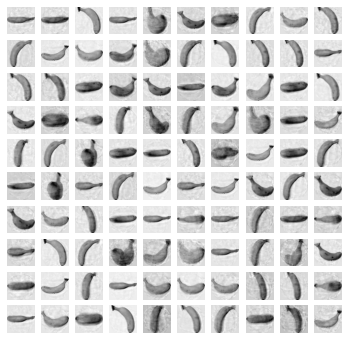

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# 특성이 복원된 데이터 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 100], 0.6)
    print()
    

## 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산(explained variance)**이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어있다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다

0.9215835424302774


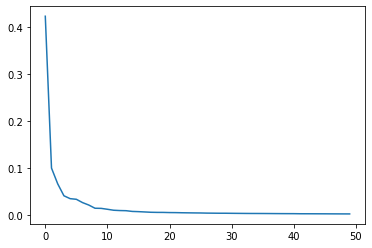

In [11]:
print(np.sum(pca.explained_variance_ratio_))

# 설명된 분산의 비율 그래프로 나타내기
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 처음 10개의 주성분이 대부분의 분산을 표현하고 있다는 것을 알 수 있다